**Problem statement:** 
You are a marketing data analyst and the CMO of the company is saying that the previous marketing campaigns have not been effective. You have to analyze the data to identify the problem and suggest data driven solutions

In [43]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Get the data
df = pd.read_csv("marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


#### **Data Cleaning and Preprocessing**

Income column has space so rename to avoid errors

In [4]:
df.rename(columns={' Income ': 'Income'}, inplace=True)
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Change Dt_Customer column datatype from object to datetime

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

Transform Income column

In [8]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Null Values/Missing Values

In [10]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

The feature Income contains 24 null values

Plot this feature to identify best strategy for imputation

Findings:

Most incomes are distributed between $0-\$100,000, with a few outliers

Will impute null values with median value, to avoid effects of outliers on imputation value

<Axes: >

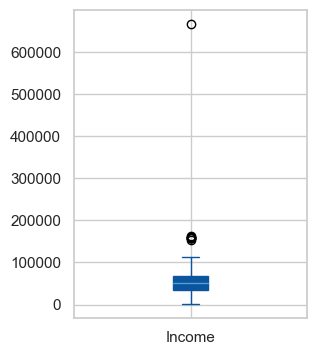

In [11]:
df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [12]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [13]:
df.isnull().sum().sort_values(ascending=False)

ID                     0
Year_Birth             0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Country                0
dtype: int64

In [14]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

'2n Cycle' and 'Master' are the same so we will name '2n Cycle' as Master

In [15]:
df['Education'] = df['Education'].replace('2n Cycle','Master')
df['Education'] = df['Education'].replace('Graduation','Undergraduate')

'YOLO', 'Alone', 'Absurd' all mean single

In [16]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [17]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO','Alone','Absurd','Divorced','Widow'],'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Married', 'Together')

In [18]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Undergraduate,Single,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Undergraduate,Together,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


#### **EDA**

Outliers

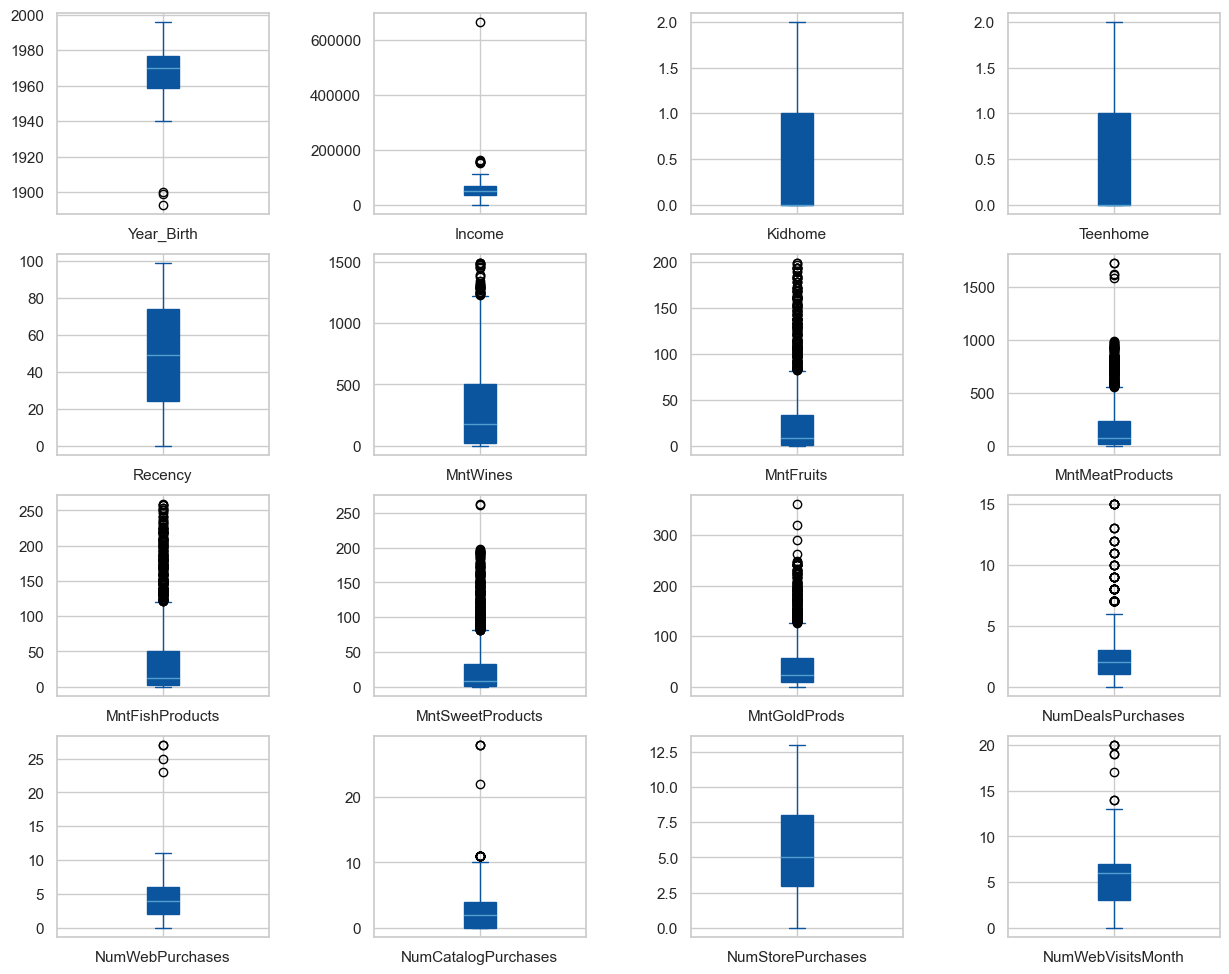

In [19]:
# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(15,12), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [20]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Undergraduate,Single,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Undergraduate,Together,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


We can identify some outliers for both Year_Birth and Income. Seems like we have customers who are over 100 years old, or earn a household income of more than $600,000!

In [21]:
indexdrop = df[(df['Year_Birth'] <= 1900) | (df['Income'] > 200000)].index
df.drop(indexdrop, inplace=True)

In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Undergraduate,Single,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Undergraduate,Together,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


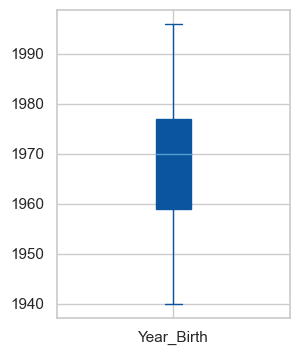

In [23]:
plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind='box', patch_artist=True);

In [24]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Undergraduate,Single,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Undergraduate,Together,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


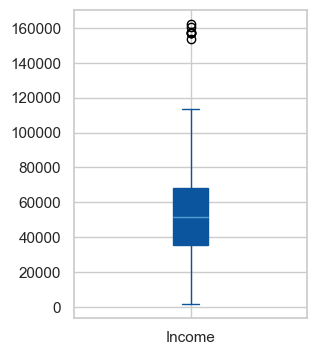

In [25]:
plt.figure(figsize=(3,4))
df['Income'].plot(kind='box', patch_artist=True);

In [26]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Undergraduate,Single,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Undergraduate,Together,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


#### **Feature Engineering**

What variables can we engineer given our current list of variables?

- From Year_Birth we can derive Age
- From Age we can then derive Age_Demographic - an important marketing variable when considering targets
    
    Baby Boomer is a customer with an age greater than 54
    
    Gen X is a customer with an age between 38 & 54
    
    Gen Y is a customer with an age between 18 & 38
    
    Gen Z is a customer with an age less than 18
    
- From Kidhome and Teenhome we can derive TotalChildren
- From the 6 Mnt product variables we can drive TotalMntSpent
- From the number of purchases through the 3 channels (Web, Store, Catalog) we can derive NumTotalPurchases


In [27]:
#Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

#Total Amount spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

#Total purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

#Total Campaigns accepted
campaign_cols = [col for col in df.columns if 'Cmp' in col] + ['Response']
df['TotalCampaignsAcc'] = df[campaign_cols].sum(axis=1)

#Customer Age assuming current year as 2014
df['CustomerAge'] = 2014 - df['Year_Birth']

In [28]:
#Age based classification
for i in df['CustomerAge'].copy():
    if i > 54:
        df['CustomerAge'] = df['CustomerAge'].replace(i, 'Baby Boomer')
    elif i > 38:
        df['CustomerAge'] = df['CustomerAge'].replace(i, 'Gen X')
    elif i > 18:
        df['CustomerAge'] = df['CustomerAge'].replace(i, 'Gen Y')
    else:
        df['CustomerAge'] = df['CustomerAge'].replace(i, 'Gen Z')

df['CustomerAge']


0             Gen X
1             Gen X
2       Baby Boomer
3             Gen X
4             Gen Y
           ...     
2235          Gen Y
2236          Gen Y
2237          Gen Y
2238          Gen Y
2239          Gen X
Name: CustomerAge, Length: 2236, dtype: object

In [29]:
#Newly added columns
df[['Dependents', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc', 'CustomerAge']].head()

,Dependents,TotalMnt,TotalPurchases,TotalCampaignsAcc,CustomerAge
0,0,1190,15,1,Gen X
1,0,577,18,2,Gen X
2,1,251,11,0,Baby Boomer
3,2,11,4,0,Gen X
4,1,91,8,2,Gen Y


### Data Visualization

Visualizing People Demographic Variables

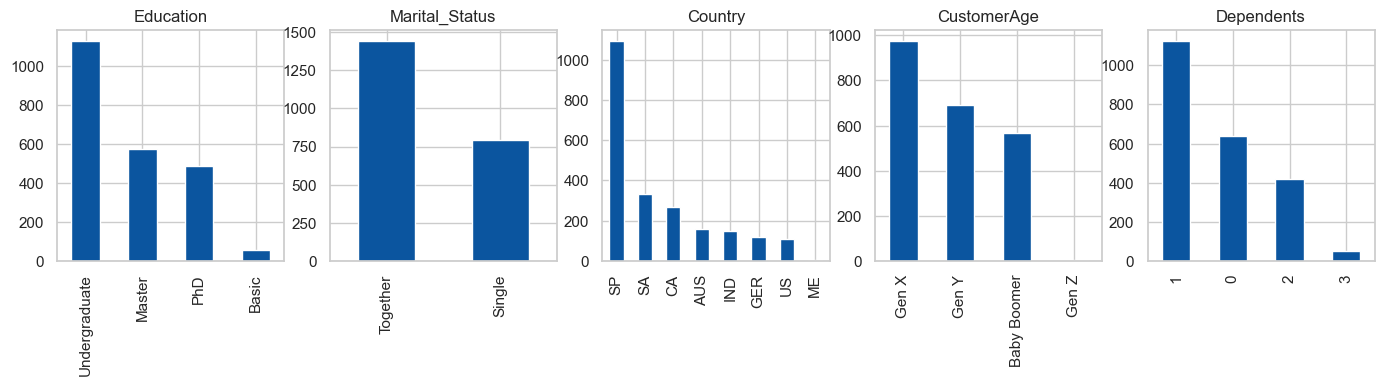

In [30]:
categorical_features = ['Education', 'Marital_Status', 'Country', 'CustomerAge', 'Dependents']

fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", figsize=(17,3), ax=ax[i]).set_title(categorical_feature)
fig.show()

Correlation Matrix

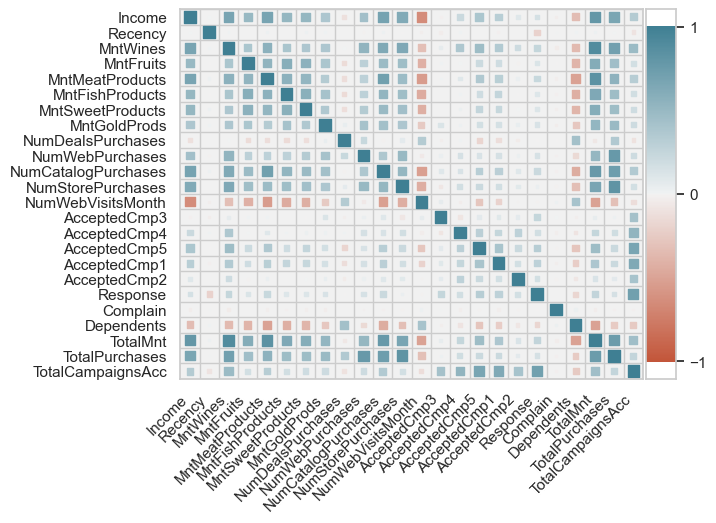

In [31]:
df_corr = df.drop(columns=['ID', 'Teenhome', 'Year_Birth', 'Kidhome'])
data = df_corr.corr()
corrplot(data, size_scale=70, marker='s')


**Observaions from correlation matrix**

INCOME:
- Positive effect of income and spending (mnt columns)
- negative effect between income and web visits
- positive effect between income and purchases
- positive between income and cmp 1 and 5

RESPONSE
- negative between recency and responce: higher the number of days since last purchase lower the response rate: Inactive customers: also proved by positive corr between Acceptedcmp5 and response

DEPENDENTS
- positive between deal purchases and dependents
- positive between dependents and webvisits
- negative between dependents and mntmeatproducts

WEB PURCHASES
- positive between web purchases and wine

DEAL PURCHASES
- positive between deal purchases and web visits: deals bring customers to website



**Plot illustrating the effect of high income on total spending:**

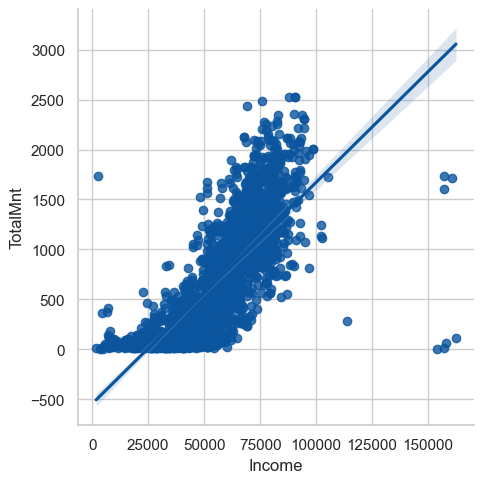

In [32]:
sns.lmplot(x='Income', y='TotalMnt', data=df);

**Plot illustrating the effect of high income on Total Purchases:**

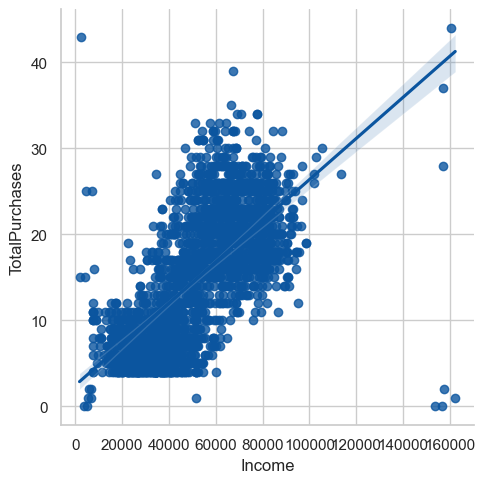

In [33]:
sns.lmplot(x='Income', y='TotalPurchases', data=df);

Plot illustrating the positive effect of income on Total campaign acceptance rate

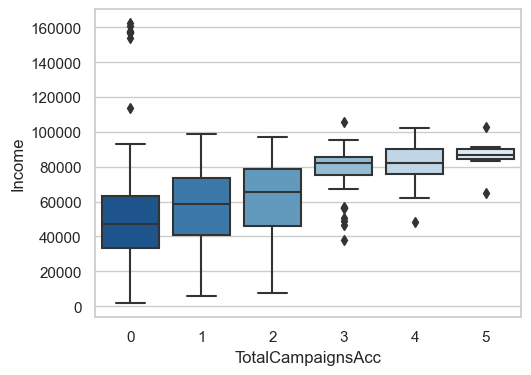

In [34]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df);

Plot illustrating negative effect of having dependents (kids & teens) on spending:

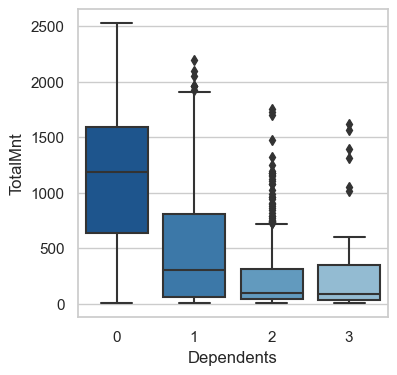

In [35]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=df);

Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased:

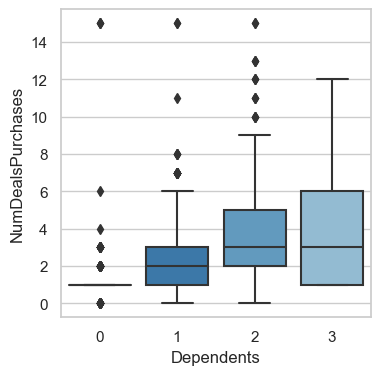

In [36]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df);

Plot illustrating the negative effect of having dependents on campaign acceptance rate

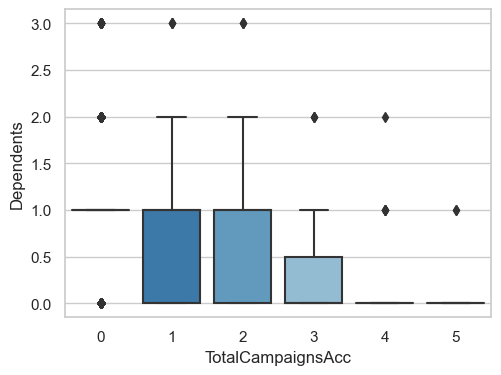

In [37]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Dependents', data=df);

Investigate anomaly:

- Number of web visits in the last month is not positively correlated with number of web purchases
- Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website

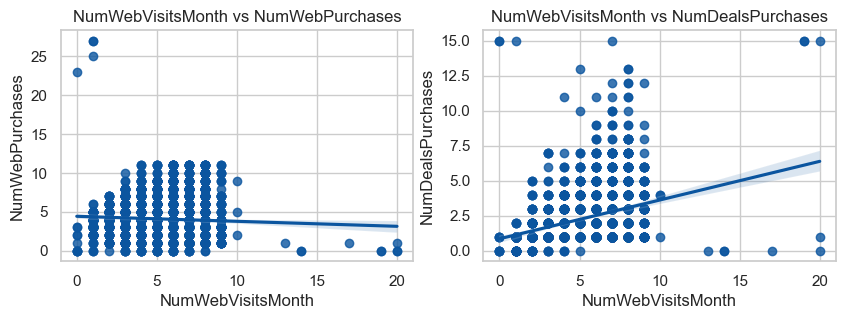

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.regplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df, ax=axes[0])
axes[0].set_title('NumWebVisitsMonth vs NumWebPurchases')

sns.regplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df, ax=axes[1])
axes[1].set_title('NumWebVisitsMonth vs NumDealsPurchases')

#plt.tight_layout()

plt.show()

## **Statistical Analysis**

One Hot Encoding:

These categorical variables are already One Hot Encoded:

- Complain
- AcceptedCmp3
- AcceptedCmp4
- AcceptedCmp5
- AcceptedCmp1
- AcceptedCmp2
- 

However, these categorical variables still need to be One Hot Encoded:

- Education
- Marital_Status
- CustomerAge
- Country

In [39]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,TotalMnt,TotalPurchases,TotalCampaignsAcc,CustomerAge
0,1826,1970,Undergraduate,Single,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,1190,15,1,Gen X
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,577,18,2,Gen X
2,10476,1958,Undergraduate,Together,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,251,11,0,Baby Boomer
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,11,4,0,Gen X
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,91,8,2,Gen Y


In [40]:
df_encoded = pd.get_dummies(df, columns = ['Education', 'Marital_Status', 'CustomerAge', 'Country'])
df_encoded

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,TotalMnt,TotalPurchases,TotalCampaignsAcc,Education_Basic,Education_Master,Education_PhD,Education_Undergraduate,Marital_Status_Single,Marital_Status_Together,CustomerAge_Baby Boomer,CustomerAge_Gen X,CustomerAge_Gen Y,CustomerAge_Gen Z,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,1190,15,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,577,18,2,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,251,11,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,1386,1967,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,11,4,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
4,5371,1989,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,91,8,2,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,1,689,20,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2236,5263,1977,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,1,55,5,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2237,22,1976,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,1,309,14,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2238,528,1978,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,0,1383,20,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


**What factors are significantly related to the number of store purchases?**

We will use use a linear regression model with NumStorePurchases as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases

Dropping unnecessary features

In [41]:
df_encoded = df_encoded.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome','Dt_Customer'], axis=1)

In [45]:
#Split the data into 70/30 train/test keeping "NumWebPurchases" as the target variable

X = df_encoded.drop(columns=['NumWebPurchases'])
y = df_encoded['NumWebPurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.shape, y.shape

((2236, 41), (2236,))

In [46]:
#Standardize the data before training

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

- Fit linear regression model to training data (70% of dataset)
- Evaluate predictions on test data (30% of dataset) using RMSE

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Training
model = LinearRegression()
model.fit(X_train, y_train)

#Testing
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  3.630751326055076e-14
Median value of target variable:  4.0


#### Findings: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions

Identify features that significantly affect the number of store purchases, using permutation importance:

In [51]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

#### Findings: 

Significant features:
- 'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases'
- All other features are not significant

**Which country has the highest number of purchases and amount spent**

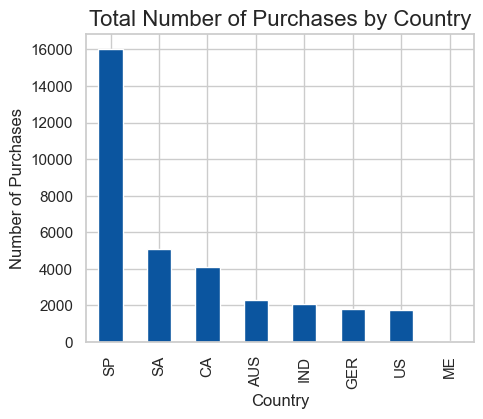

In [52]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

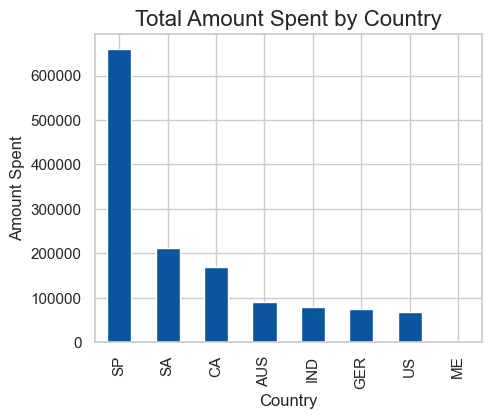

In [53]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent');

##### Findings:

- Spain (SP) has the highest total amount spent and purchases

- **Which Marketing campaign was the most successful?**

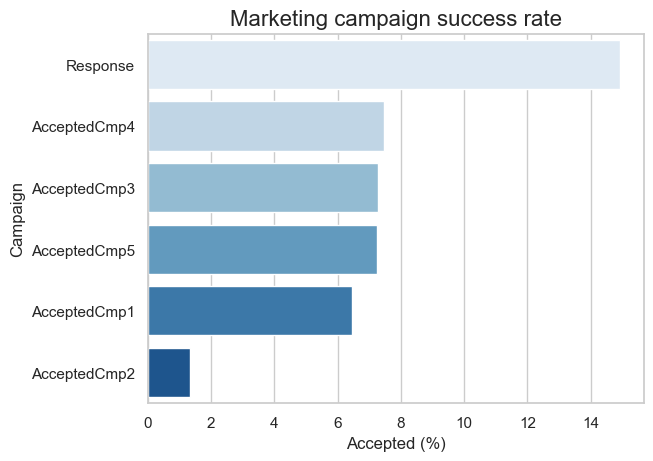

In [60]:
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent', ascending=False), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

#### Is there a significant relationship between geographical regional and success of a campaign?

#### What does the average customer look like for this company?

In [54]:
# list of cols with binary responses
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [58]:
# average customer demographics
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

,Average
Year_Birth,1968.9
Income,51952.6
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


The average customer is: 

- Born in 1969
- Has an income of roughly $52,000 per year
- Has 1 dependent (roughly equally split between kids or teens)
- Made a purchase from our company in the last 49 days

#### Which products are performing best?

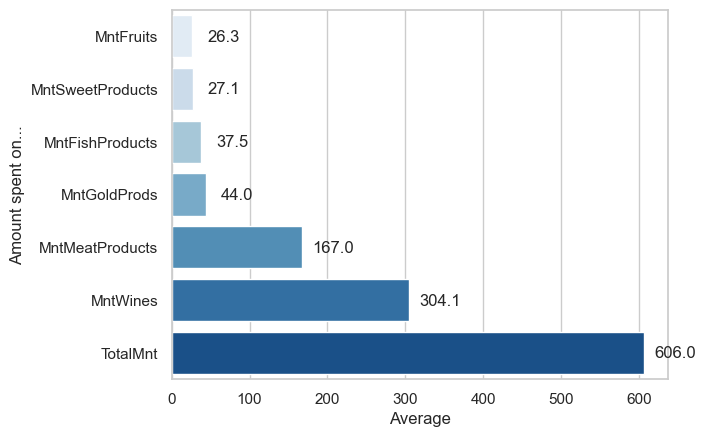

In [62]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

#### Findings: 

The average customer spent...
- $25-50 on Fruits, Sweets, Fish, or Gold products
- Over $160 on Meat products
- Over $300 on Wines
- Over $600 total

Products performing best:
- Wines
- Followed by meats

#### Which channels are underperforming?

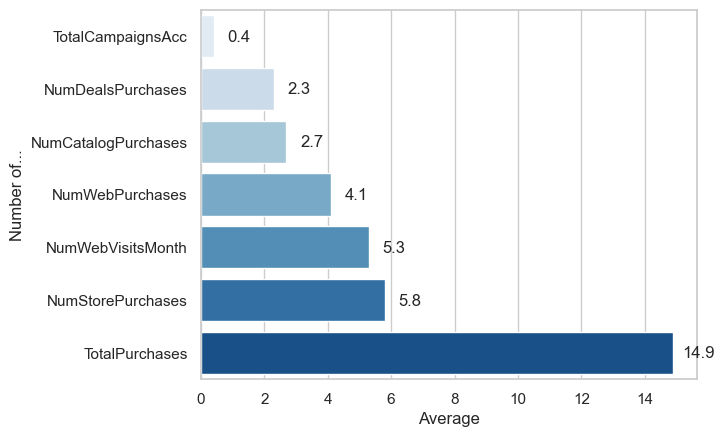

In [63]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

#### Findings: 

Channels: The average customer...
- Accepted less than 1 advertising campaign
- Made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 5 store purchases
- Averaged 14 total purchases
- Visited the website 5 times

Underperforming channels:
- Advertising campaigns
- Followed by deals, and catalog